# 10.1

In [1]:
def small_prime_list(n):
    '''
    Generate a list of primes less than or equal to n.
    '''
    assert 2 <= n <= 2**20
    isprime = {i:1 for i in range(2, n+1)}
    index = 2
    while index**2 <= n:
        # mark all multiples of the prime as non-prime
        coef = 2
        while coef * index <= n:
            isprime[coef*index] = 0
            coef += 1
        # skip to the next prime
        index += 1
        while isprime[index] == 0:
            index += 1
    primes = [i for i in range(2, n+1) if isprime[i] == 1]
    return primes

In [2]:
print(small_prime_list(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [3]:
import time

times = []

for i in range(1, 21):
    start = time.time()
    small_prime_list(2**i)
    end = time.time()
    duration = end - start
    print(i, duration)
    times.append((i, duration))

print(times)

1 5.7220458984375e-06
2 1.1205673217773438e-05
3 5.9604644775390625e-06
4 1.1205673217773438e-05
5 1.7881393432617188e-05
6 2.9802322387695312e-05
7 8.177757263183594e-05
8 0.0005199909210205078
9 0.0001430511474609375
10 0.00045490264892578125
11 0.0009322166442871094
12 0.0021088123321533203
13 0.003880023956298828
14 0.009237051010131836
15 0.020827054977416992
16 0.039153099060058594
17 0.07208871841430664
18 0.13955307006835938
19 0.3312809467315674
20 0.6431999206542969
[(1, 5.7220458984375e-06), (2, 1.1205673217773438e-05), (3, 5.9604644775390625e-06), (4, 1.1205673217773438e-05), (5, 1.7881393432617188e-05), (6, 2.9802322387695312e-05), (7, 8.177757263183594e-05), (8, 0.0005199909210205078), (9, 0.0001430511474609375), (10, 0.00045490264892578125), (11, 0.0009322166442871094), (12, 0.0021088123321533203), (13, 0.003880023956298828), (14, 0.009237051010131836), (15, 0.020827054977416992), (16, 0.039153099060058594), (17, 0.07208871841430664), (18, 0.13955307006835938), (19, 0.33

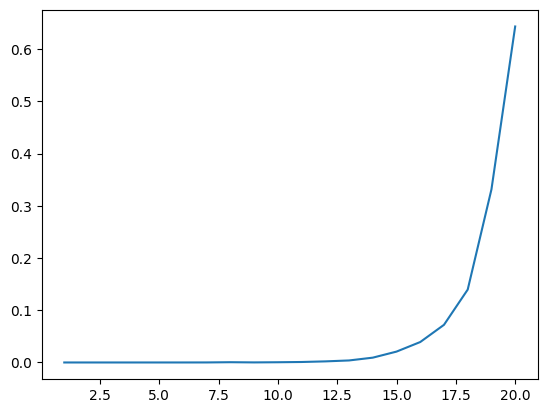

In [4]:
import matplotlib.pyplot

X, y = zip(*times)

matplotlib.pyplot.plot(X,y)
matplotlib.pyplot.show()



The sieve of erastothenes runs in exponential time with respect to the length of its input (the number of bits required to represent the input value).

# 10.2

In [5]:
x1 = (((((13635 + 16060) % 29101) + 8190) % 29101) + 21363) % 29101
x2 = (13635 + 16060 + 8190 + 21363) % 29101
print(x1, x2)

1046 1046


# 10.3

In [6]:
x1 = (((12358 * 1854) % 29101) * 14303) % 29101
x2 = (12358 * 1854 * 14303) % 29101
print(x1, x2)

25392 25392


# 10.4

{1,3,4} is not a subgroup of the multiplicative group of integers modulo 7

In [7]:
subgroup = set([1,3,4])
for i in subgroup:
    for j in subgroup:
        product = (i*j) % 7
        if not (product in subgroup):
            print(i, '*', j, '=', product)

3 * 3 = 2
3 * 4 = 5
4 * 3 = 5
4 * 4 = 2


# 10.5

In [8]:
def gcd(a,b):
    assert a >= 0 and b >= 0
    lesser,greater = sorted([a,b])
    print(lesser,greater)
    while lesser > 0:
        lesser_next = greater % lesser
        greater_next = lesser
        print(lesser_next,greater_next)
        lesser = lesser_next
        greater = greater_next
    return greater

In [9]:
print(gcd(91261, 117035))

91261 117035
25774 91261
13939 25774
11835 13939
2104 11835
1315 2104
789 1315
526 789
263 526
0 263
263


# 10.6

In [10]:
import math

def extended_gcd(a, b):
    assert a >= 0 and b >= 0
    a_original, b_original = sorted([a,b])
    a = a_original
    b = b_original
    coef_a = 1
    coef_b = 0
    while a > 0:
        q = math.floor(b / a) # quotient
        print(f'quotient: {q}')
        r = b % a
        print(f'remainder: {r}')
        b = a
        a = r
        coef_a_saved = coef_a
        coef_a = coef_b - q * coef_a
        coef_b = coef_a_saved
        print(f"({coef_a} * {a_original}) + ({coef_b} * {b_original}) (mod {b_original}) = {(coef_a * a_original + coef_b * b_original) % b_original}")
        assert (coef_a * a_original + coef_b * b_original) % b_original == r
    print(f'inverse of {a_original} (mod {b_original}) is {coef_b}, because {coef_b} * {a_original} = {(coef_b * a_original) % b_original}')
    return coef_b

In [11]:
inverse_a = extended_gcd(74,167)
print((inverse_a * 74) % 167)

quotient: 2
remainder: 19
(-2 * 74) + (1 * 167) (mod 167) = 19
quotient: 3
remainder: 17
(7 * 74) + (-2 * 167) (mod 167) = 17
quotient: 1
remainder: 2
(-9 * 74) + (7 * 167) (mod 167) = 2
quotient: 8
remainder: 1
(79 * 74) + (-9 * 167) (mod 167) = 1
quotient: 2
remainder: 0
(-167 * 74) + (79 * 167) (mod 167) = 0
inverse of 74 (mod 167) is 79, because 79 * 74 = 1
1


# 10.7

In [14]:
import math 
import random

def rabin_miller(n):
  assert n >= 3
  assert n % 2 == 1
  s, t = n-1, 0
  while s % 2 == 0:
    s, t = s//2, t+1
  k  = 0
  while k < 128:
    a = random.randint(2, n-1)
    v = pow(a, s, n)
    if v != 1:
      i = 0
      while v != n-1:
        if i == t - 1:
          return False
        else:
          v, i = v**2 % n, i + 1
    k = k + 2
  return True

small_primes = None

def is_prime(n):
  global small_primes
  assert n >= 3
  if small_primes == None:
    small_primes = small_prime_list(1_000)
  for p in small_primes:
    if n % p == 0:
      return p == n
  return rabin_miller(n)

def generate_large_prime(l, u):
    assert 2 < l <= u
    max_attempts = int(100 * (math.log(u, 2) + 1))
    for i in range(max_attempts):
      n = random.randint(l, u)
      if is_prime(n): return n


In [15]:
generate_large_prime(2**255, 2**256-1)

is_prime 88261427205860706040177965270523347253324313461982767491171045206384723630209
is_prime 80253080867863980421045710238314296507812593446254151187621784748638019736984
is_prime 97820651630882233497821229387194178660069855744642337721079316586148319949583
is_prime 102171247004467711654711840602638034051184343031156705989199849106876821399969
is_prime 77311316951179318687960058372983225719570407920416831482123592577491683621312
is_prime 87156135838902952406999934662230939643531191141816570807350198166790832278783
is_prime 113704116528544817199803160189719584523573307511370707126318785969373624746523
is_prime 58901904478178141264674592953235329708614900538510592158499716325081176742784
is_prime 86476628738425545198345572807557190203414594114741627304029168228687929469108
is_prime 114605996411219744585286847692523685781788209871737798614679160880889354181216
is_prime 74639897654114550066787030387010194248853324271536461772763684066144645566797
is_prime 5838390388131641175755353608211

83319887529862218242892254313412152910928816600985742867590647261894980137161

# 10.7

In [28]:
import math
def mypow(base, exponent, modulus):
  actions = []
  i = exponent
  while i > 1:
    if i % 2 == 0:
      actions.append('double')
      i = i // 2
    else:
      actions.append('multiply')
      i = i - 1
  out = base
  while len(actions) > 0:
    action = actions.pop()
    if action == 'double':
      out *= out 
    else:
      out *= base 
    out = out % modulus
    print(action, out)
  return out

correct = pow(73,82,91)
given = mypow(73,82,91)
assert given == correct

double 51
double 53
multiply 47
double 25
double 79
double 53
multiply 47
double 25


# 10.9

In [29]:
mypow(27, 35, 569)

double 160
double 564
double 25
double 56
multiply 374
double 471
multiply 199


199

7 multiplications